In [3]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# load the dataset
data = pd.read_csv('/content/AirPassengers.csv')

# assign date to the index position
data = pd.read_csv('AirPassengers.csv', index_col = 0, parse_dates = True)


In [5]:
# print the data
print(data)

            Passengers
Date                  
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]


In [6]:
# display the first five rows of the dataset
print(data.head())

            Passengers
Date                  
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


In [7]:
# display the last five rows of the dataset
print(data.tail())

            Passengers
Date                  
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432


In [8]:
# shape of the dataset
print(data.shape)

(144, 1)


In [9]:
# To check if there are any NULL Values in the dataset
print(data.isnull().sum())

Passengers    0
dtype: int64


# So from the above observation, it is clear that there are no NULL Values in the dataset

In [10]:
# Getting the index from the dataset
print(data.index)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Date', length=144, freq=None)


<Axes: xlabel='Date'>

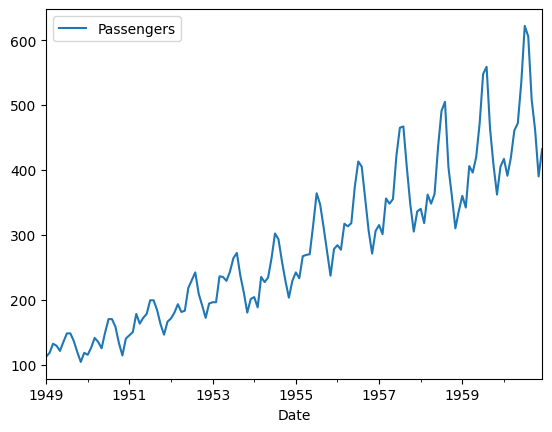

In [11]:
data[['Passengers']].plot()

# From the above observation, we can see a sesonality trend in the number of passengers who are taking their flights every singly year.
There is also an exponential increase in the number of passengers who are taking their flights per year

# ETS DECOMPOSITION

### This process is used to decompose and extract every component of the time series model

In [12]:
# To perform ets operation to extract every single component of the timeseries model
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
result = seasonal_decompose(data['Passengers'], model = 'multiplicative')

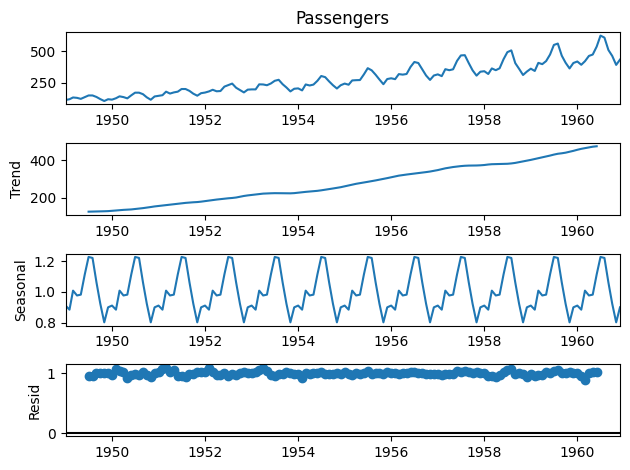

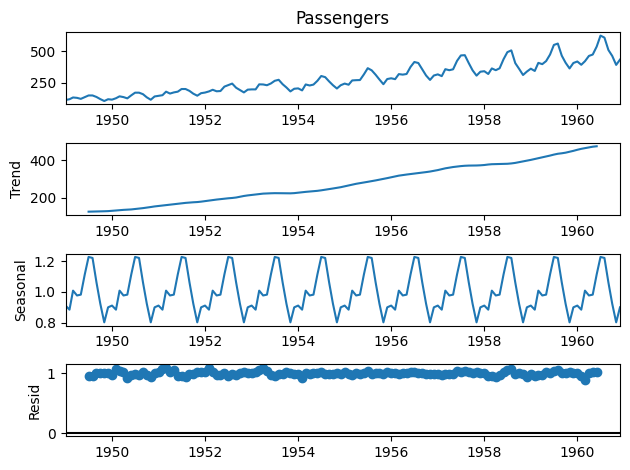

In [14]:
# To plot the result to extract every single component of the time series model
result.plot()

#### As Passengers data has upcoming trend and is seasonal in nature, so it is non - stationary in nature. To convert the non-stationary data into stationary data, we use DIFFERENCING


(i) First Order Differencing = It calculates the difference between the two consecutive numbers

# FIRST ORDER DIFFERENCING

In [15]:
data['Passengers'].shift(1)

Date
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: Passengers, Length: 144, dtype: float64

In [16]:
data['shift'] = data['Passengers'].shift(1)

In [17]:
data

,Passengers,shift
Date,,
1949-01-01,112,NaN
1949-02-01,118,112.0
1949-03-01,132,118.0
1949-04-01,129,132.0
1949-05-01,121,129.0
...,...,...
1960-08-01,606,622.0
1960-09-01,508,606.0
1960-10-01,461,508.0


In [18]:
# To Calculate the first order differencing between two variables
data['first_order_diff'] = data['Passengers'] - data['shift']
data

,Passengers,shift,first_order_diff
Date,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0
...,...,...,...
1960-08-01,606,622.0,-16.0
1960-09-01,508,606.0,-98.0
1960-10-01,461,508.0,-47.0


In [19]:
data[['Passengers', 'first_order_diff']].head()

,Passengers,first_order_diff
Date,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


<Axes: title={'center': 'FIRST ORDER DIFFERENCE'}, xlabel='Date'>

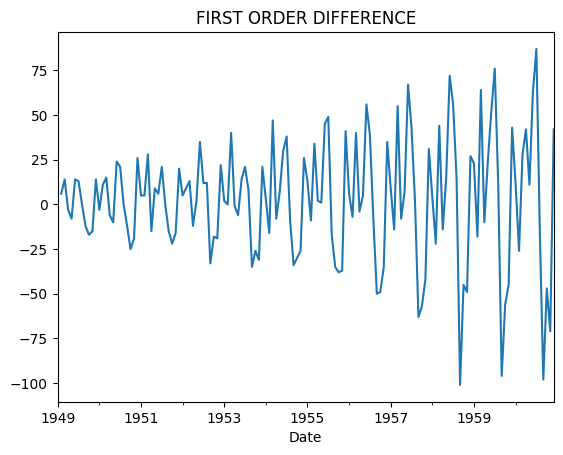

In [20]:
data['first_order_diff'].plot(title = "FIRST ORDER DIFFERENCE")

In [21]:
# Compute the mean and standard deviation of the first_order_difference value
data['mean_first_order'] = data['first_order_diff'].rolling(window = 12).mean()
data['standard_deviation_first_order'] = data['first_order_diff'].rolling(window = 12).std()

In [22]:
print("Mean of the newly first order difference is:",data['mean_first_order'] )

Mean of the newly first order difference is: Date
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    3.916667
1960-09-01    3.750000
1960-10-01    4.500000
1960-11-01    2.333333
1960-12-01    2.250000
Name: mean_first_order, Length: 144, dtype: float64


In [23]:
print("Standard Deviation of the newly first order difference is:",data['standard_deviation_first_order'] )

Standard Deviation of the newly first order difference is: Date
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
                ...    
1960-08-01    53.364030
1960-09-01    53.706483
1960-10-01    52.852281
1960-11-01    55.531045
1960-12-01    55.465182
Name: standard_deviation_first_order, Length: 144, dtype: float64


In [24]:
data

,Passengers,shift,first_order_diff,mean_first_order,standard_deviation_first_order
Date,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,112.0,6.0,NaN,NaN
1949-03-01,132,118.0,14.0,NaN,NaN
1949-04-01,129,132.0,-3.0,NaN,NaN
1949-05-01,121,129.0,-8.0,NaN,NaN
...,...,...,...,...,...
1960-08-01,606,622.0,-16.0,3.916667,53.364030
1960-09-01,508,606.0,-98.0,3.750000,53.706483
1960-10-01,461,508.0,-47.0,4.500000,52.852281


<Axes: xlabel='Date'>

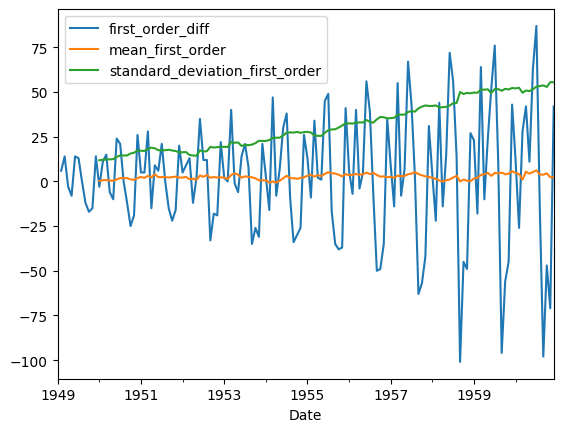

In [25]:
# plot the first order difference data values
data[['first_order_diff','mean_first_order','standard_deviation_first_order']].plot()

# So from the above observation we can see that the mean is not changing with respect to the time, so now the data has been converted from non stationary time series into a stationary time series

# AUGMENTED DICKY FULLER TEST(ADF)

In [26]:
# To import the library for ADF
from statsmodels.tsa.stattools import adfuller

# To call the object for the adfuller
adf = adfuller(data['Passengers'], autolag = 'AIC')
print(adf)

(0.8153688792060498, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [27]:
# To give the title to the ADF Function on the data
print('Performing Augmented Dickey Fuller Test on the Time Series Data')

adf_results = pd.Series(adf[0:4], index = ['ADF Test Statistics', 'P- Test', 'Lags used', 'No of observations'])

print(adf_results)

for key, value in adf[4].items():
    adf_results[f'Critical Values({key})'] = value
print(adf_results)

Performing Augmented Dickey Fuller Test on the Time Series Data
ADF Test Statistics      0.815369
P- Test                  0.991880
Lags used               13.000000
No of observations     130.000000
dtype: float64
ADF Test Statistics       0.815369
P- Test                   0.991880
Lags used                13.000000
No of observations      130.000000
Critical Values(1%)      -3.481682
Critical Values(5%)      -2.884042
Critical Values(10%)     -2.578770
dtype: float64


# So from the above observation, we can see that the  p-Test Value is 0.99 > 0.05 which is non- stationary in nature, So this Airline Passengers dataset is non-stationary in nature

In [28]:
# PLOTTING ACF PLOTS

#ACF is used to predict the autocorrelation of a time series along with it's lag.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
data = pd.read_csv('/content/airline-passengers.csv', index_col = 'Month', parse_dates = True)

In [31]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [32]:
data.index.freq = 'MS'

In [33]:
# Get all the indexes from the Airline Dataset
print(data.index)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')


In [34]:
# get the first five rows of the dataset
print(data.head())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


In [35]:
# get the last five rows of the dataset
print(data.tail())

            Passengers
Month                 
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432


In [36]:
# shape of the dataset
print(data.shape)

(144, 1)


In [37]:
# To import the library for acf and pacf

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [40]:
# To compute the acf of the Airline Passengers
print(acf(data['Passengers']))

[1.         0.94804734 0.87557484 0.80668116 0.75262542 0.71376997
 0.6817336  0.66290439 0.65561048 0.67094833 0.70271992 0.74324019
 0.76039504 0.71266087 0.64634228 0.58592342 0.53795519 0.49974753
 0.46873401 0.44987066 0.4416288  0.45722376]


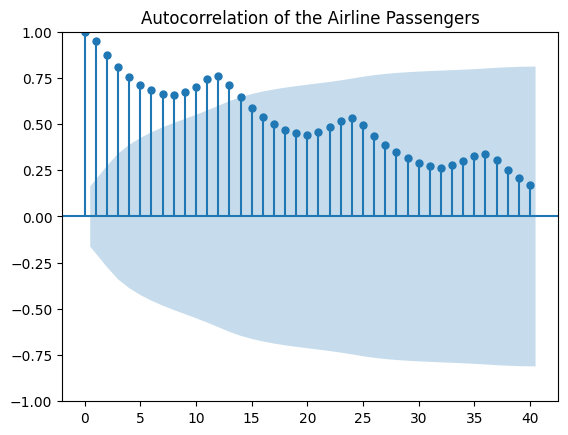

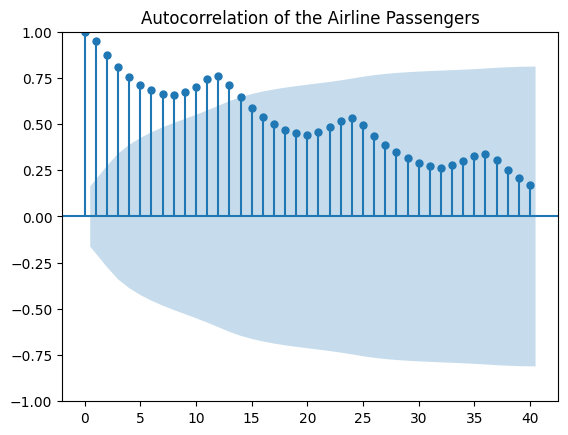

In [41]:
# To plot the acf data of the given time series
plot_acf(data, title = 'Autocorrelation of the Airline Passengers', lags = 40)

In [42]:
# From the above observation , we can see that as the lags keeps on increasing, the autocorrelation is gradually decreasing

In [44]:
print(pacf(data['Passengers']))

[ 1.          0.95467704 -0.26527732  0.05546955  0.10885622  0.08112579
  0.00412541  0.15616955  0.10370833  0.28878144  0.20691805  0.2411297
 -0.15800498 -0.7183246  -0.08948064  0.22160591  0.13462253  0.11561572
  0.1948294   0.09665618 -0.20215868 -0.0936381 ]


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


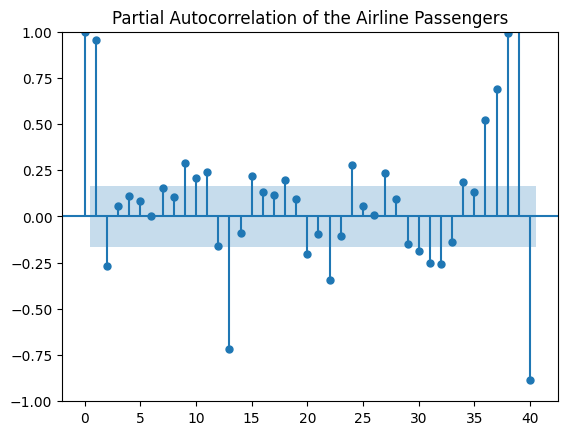

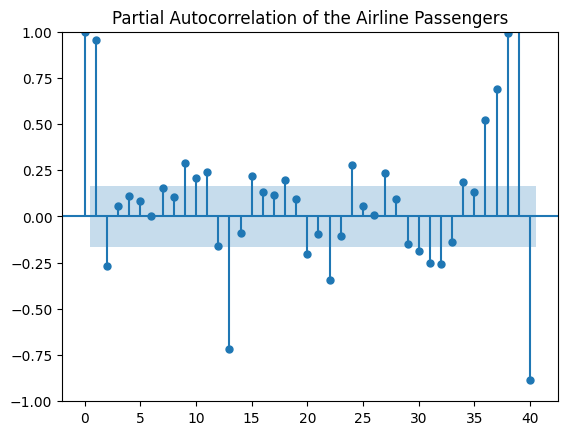

In [45]:
plot_pacf(data, title = 'Partial Autocorrelation of the Airline Passengers', lags = 40)

In [46]:
# So from the above observation, we can see that the Partial Autocorrelation value drastically increases and decreases with respect to the lags and is not consistent with respect to the lags

In [49]:
airline1 = pd.read_csv('/content/female-births.csv', index_col = 'Date', parse_dates = True)
print(airline1)

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
...            ...
1959-12-27      37
1959-12-28      52
1959-12-29      48
1959-12-30      55
1959-12-31      50

[365 rows x 1 columns]


In [50]:
airline1.index.freq = 'D'
print(airline1.index)

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq='D')


In [51]:
# print the first five rows of the dataset
print(airline1.head())

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


In [52]:
# print the last five rows of the dataset
print(airline1.tail())

            Births
Date              
1959-12-27      37
1959-12-28      52
1959-12-29      48
1959-12-30      55
1959-12-31      50


In [53]:
# shape of the dataset
print(airline1.shape)

(365, 1)


In [54]:
# To check if there are any NULL Values are there in the dataset
print(airline1.isnull().sum())

Births    0
dtype: int64


In [55]:
# So from the above observation, it is clear thata there are no NULL Values in the dataset

In [58]:
# To get the acf values for the female births
acf(airline1['Births'])

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825])

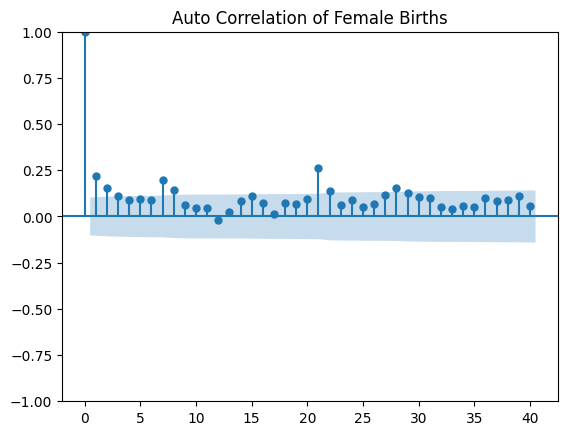

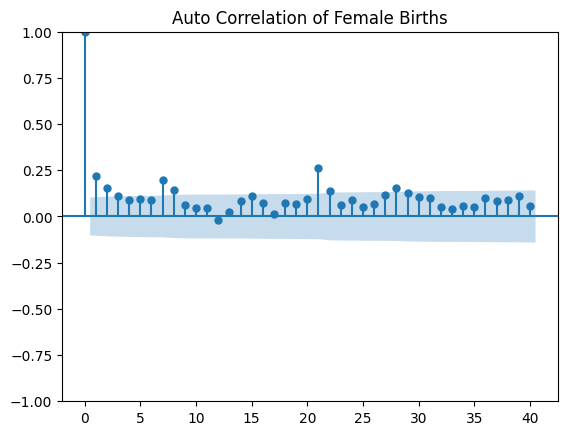

In [59]:
plot_acf(airline1, title = 'Auto Correlation of Female Births', lags = 40)

In [61]:
# So from the above observation, it is concluded that the Auto Correlation Value of the Female Births is gradually decreasing with respect to the lags.

In [63]:
pacf(airline1['Births'])

array([ 1.        ,  0.217838  ,  0.11156041,  0.05852814,  0.0459786 ,
        0.05587205,  0.04702029,  0.1597171 ,  0.06104337, -0.02551274,
       -0.00904877,  0.00647964, -0.07058219,  0.0050556 ,  0.05362211,
        0.06878988,  0.02415971, -0.03056841,  0.0544255 ,  0.05454283,
        0.06743626,  0.23739343,  0.01524253, -0.05963034,  0.03530625,
       -0.02208946])

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


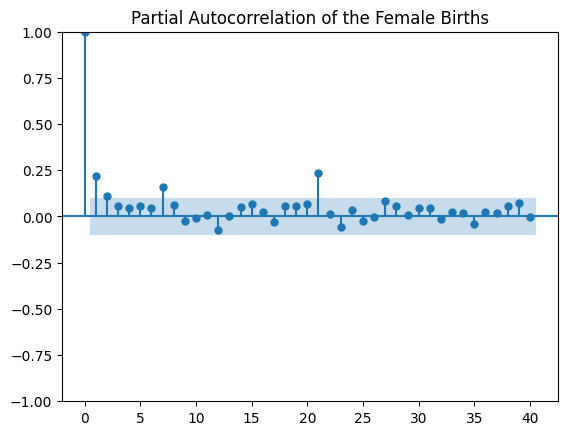

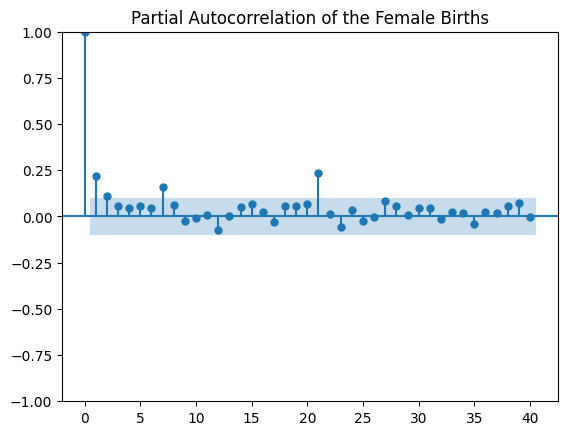

In [64]:
plot_pacf(airline1, title = 'Partial Autocorrelation of the Female Births', lags = 40)

In [65]:
# So from the above onbservation, it is concluded that the Partial Auto Correlation Value is gradually decreasing with respect to the lags.